In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import math as m
import nuSQUIDSpy as nsq
import pisa
import h5py as hdf

<< PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


In [2]:
from pisa.core.distribution_maker import DistributionMaker
from pisa import ureg as units

In [3]:
U_24_bestfit = 0.16
deltam14sq_bestfit = 3.5 * units.eV**2
th24_bestfit = 0.5*(np.arcsin(np.sqrt(U_24_bestfit)) * units.rad).to('degree')

pipepath = '/afs/ifh.de/user/b/buchholl/scratch/software/fridge/analysis/oscNext_flercnn_sterile/settings/pipeline/'

In [4]:
def neuconfigToTemplate(neucfg):
    pipe = [neucfg]
    template = DistributionMaker(pipe)

    return template

In [5]:
def calculateChi2ModOsc(self_template,th24,th34,metric='mod_chi2'):
    self_template.params.theta24.value = 0.0*units.degree
    self_template.params.theta34.value = 0.0*units.degree    
    self = self_template.get_outputs(return_sum=True)[0]

    self_template.params.theta24.value = float(th24)*units.degree
    self_template.params.theta34.value = float(th34)*units.degree
    self_template.params.deltam41.value = 1.0 * units.eV**2

    oscillated_template = self_template.get_outputs(return_sum=True)[0]
    
    return oscillated_template.metric_total(self,metric)

In [6]:
vs_cfg = pipepath+"neutrinos_mixing_angles_vs.cfg"
flercnn_std_cfg = pipepath+'pipeline_oscNext_neutrinos_2std_osc_nh_flercnn.cfg'
flercnn_cfg = pipepath+'pipeline_oscNext_neutrinos_nsq_test.cfg'
y_cfg = [pipepath+'pipeline_oscNext_neutrinos_std_osc_nh_noysplit_mixed.cfg',
         pipepath+'pipeline_oscNext_neutrinos_std_osc_nh_ysplit_mixed.cfg',
         pipepath+'pipeline_oscNext_neutrinos_std_osc_nh_noysplit_tracks.cfg',
         pipepath+'pipeline_oscNext_neutrinos_std_osc_nh_ysplit_tracks.cfg']

In [7]:
vs_chi2mod = []
flercnn_chi2mod = []
flercnn_std_chi2mod = []
y_chi2mod = []

In [8]:
th24range = np.linspace(5,25,3)
th34range = np.linspace(5,25,3)

th24_th34_grid = []

for i in th24range:
    for j in th34range:
        th24_th34_grid.append((i,j))

In [9]:
for th24,th34 in th24_th34_grid:
    continue
    th24=th24
    th34=th34
    
    flercnn_chi2mod.append(calculateChi2ModOsc(neuconfigToTemplate(flercnn_cfg),th24,th34))
    flercnn_std_chi2mod.append(calculateChi2ModOsc(neuconfigToTemplate(flercnn_std_cfg),th24,th34))
    vs_chi2mod.append(calculateChi2ModOsc(neuconfigToTemplate(vs_cfg),th24,th34))
    
    ystorage = 0
    for cfg in y_cfg:
        ystorage+=calculateChi2ModOsc(neuconfigToTemplate(cfg),th24,th34)
        
    y_chi2mod.append(ystorage)

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

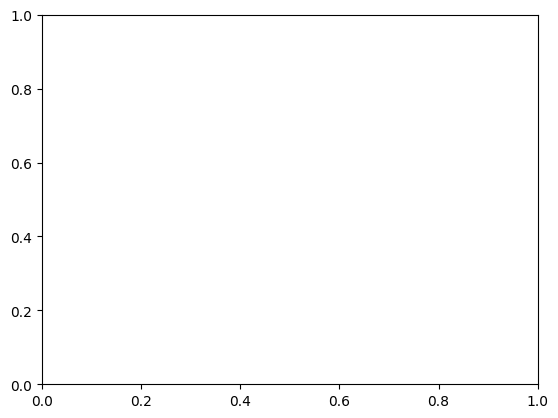

In [10]:
plt.plot(range(len(th24_th34_grid)),np.array(flercnn_chi2mod)/(180/np.pi),label='FLERCNN Adjusted PID',ls='',marker='+',lw=1.7)
plt.plot(range(len(th24_th34_grid)),np.array(flercnn_std_chi2mod)/(180/np.pi),label='FLERCNN Standard',ls='',marker='o',lw=0.7)
plt.plot(range(len(th24_th34_grid)),np.array(vs_chi2mod)/(180/np.pi),label='Verification Sample',ls='',marker='o',lw=0.7)
plt.plot(range(len(th24_th34_grid)),np.array(y_chi2mod)/(180/np.pi),label='Inelasticity Binning',ls='',marker='x',lw=1.7)
plt.xticks(ticks=range(len(th24_th34_grid)),labels=([(th24,th34) for (th24,th34) in th24_th34_grid]),rotation=45);
plt.xlabel('(th24,th34)')
plt.ylabel(r'$\Delta \chi$$^{2}_{mod}/%s$' % (180/np.pi))
plt.yscale('log')
plt.legend()

In [ ]:
plt.plot(range(len(th24_th34_grid)),
         (-np.array(flercnn_chi2mod)+np.array(y_chi2mod))/np.array(flercnn_chi2mod),ls='--',marker='+')
plt.xticks(ticks=range(len(th24_th34_grid)),labels=([(th24,th34) for (th24,th34) in th24_th34_grid]),rotation=45);
plt.xlabel('(th24,th34)')
plt.ylabel(r'($\chi$$^{2}_{mod, y}$ - $\chi$$^{2}_{mod, FLERCNN}$)/$\chi$$^{2}_{mod, FLERCNN}$')

In [ ]:
events purtiy fraction chi^2 per bin category per pipeline for SM and sterile

In [ ]:
vs_template = neuconfigToTemplate(vs_cfg)

In [ ]:
vs_template.params.theta24.value = float(0)*units.degree
vs_template.params.theta34.value = float(0)*units.degree

vs_total = vs_template.get_outputs(return_sum=True)
vs_indiv = vs_template.get_outputs(return_sum=False)

vs_template.params.theta24.value = float(15)*units.degree
vs_template.params.theta34.value = float(15)*units.degree
vs_template.params.deltam41.value = 1.0 * units.eV**2

vs_total_oscillated = vs_template.get_outputs(return_sum=True)[0]
vs_indiv_oscillated = vs_template.get_outputs(return_sum=False)[0]

In [ ]:
vs_total_oscillated.metric_total(vs_total,'mod_chi2')

In [ ]:
vs_total_oscillated.slice(pid='mixed').metric_total(vs_total.slice(pid='mixed'),'mod_chi2')

In [ ]:
vs_total.chi2_per_map.plot()